In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
from os.path import join
import os
import random
from functools import partial
from keras.models import Model, load_model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Reshape, concatenate
from keras.optimizers import Nadam
from keras.layers.advanced_activations import ELU
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.backend import binary_crossentropy
import ntpath

import tensorflow as tf

K.clear_session()
K.set_image_dim_ordering('tf')

print(K.image_data_format())
smooth = 1e-12
num_examples = 0

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


channels_last


In [2]:

def jaccard_coef(y_true, y_pred):
    intersection = K.sum(y_true * y_pred, axis=[0, -1, -2])
    sum_ = K.sum(y_true + y_pred, axis=[0, -1, -2])

    jac = (intersection + smooth) / (sum_ - intersection + smooth)

    return K.mean(jac)


def jaccard_coef_int(y_true, y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))

    intersection = K.sum(y_true * y_pred_pos, axis=[0, -1, -2])
    sum_ = K.sum(y_true + y_pred_pos, axis=[0, -1, -2])

    jac = (intersection + smooth) / (sum_ - intersection + smooth)

    return K.mean(jac)


def jaccard_coef_loss(y_true, y_pred):
    return -K.log(jaccard_coef(y_true, y_pred)) + binary_crossentropy(y_pred, y_true)



In [3]:
def preprocess_old(image, gray):
    mask = np.ones((512,512), dtype="uint8") * 255
    nu=0
    _, contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for i, c in enumerate(contours):
        area = int(cv2.contourArea(c))
        if area <10:
            
            if nu<1:
                print(area)
                nu=nu+1
                cv2.drawContours(mask, [c], -1, 0, -1)
    image = cv2.bitwise_and(image, image, mask=mask)
    return image

In [4]:
def preprocess(image, gray):
    ret, gray = cv2.threshold(gray, 250, 255,0)
    imageha, contours, hierarchy = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    largest_areas = sorted(contours, key=cv2.contourArea)
    #x,y,w,h = cv2.boundingRect(largest_areas[-1])
    mask = np.zeros((512,512),dtype= np.uint8)
    cv2.drawContours(mask, [largest_areas[-1]], 0, (255,255,255,255), -1)
    rt = cv2.bitwise_and(image, image, mask=mask)
    return rt

In [6]:
model = load_model('modeltr.h5', custom_objects={'jaccard_coef_int': jaccard_coef_int,'jaccard_coef_loss': jaccard_coef_loss})

In [ ]:
import glob
count=0
image_size = 512
orig_path = "masks/generate_train/batch1/*"
mask_path = "masks/generate_output/batch1/"
#output_mask_path = "masks/output/"
orig = glob.glob(orig_path)
temp = orig[:48]
for fl in temp:
    orig_images = cv2.imread(fl)
    orig_images = cv2.resize(orig_images, (512, 512))
    image = np.expand_dims(orig_images, axis=0)
    mpo = model.predict(image)
    a = np.uint8(mpo*255)
    a = a.reshape(512,512,3)
    gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
    output_mask = preprocess(a, gray)
    fig = plt.figure(figsize=(50, 50))
    columns = 2
    rows = 1
    count= count+1
    basenm = ntpath.basename(fl)
    nm_output_mask = mask_path+basenm
    tite=fl+"Image No:"+ str(count)
    fig.add_subplot(rows, columns, 1)
    plt.imshow(orig_images)
    fig.add_subplot(rows, columns, 2)
    #res = cv2.bitwise_and(orig_images, output_mask)
    plt.imshow(output_mask)
    plt.title(tite,fontsize=26)
    plt.show()


In [ ]:
#BAtch 2 of images
#output_mask_path = "masks/output/"
orig = glob.glob(orig_path)
temp1 = orig[48:96]
for fl in temp1:
    orig_images = cv2.imread(fl)
    orig_images = cv2.resize(orig_images, (512, 512))
    image = np.expand_dims(orig_images, axis=0)
    mpo = model.predict(image)
    a = np.uint8(mpo*255)
    a = a.reshape(512,512,3)
    gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
    output_mask = preprocess(a, gray)
    fig = plt.figure(figsize=(50, 50))
    columns = 2
    rows = 1
    count= count+1
    basenm = ntpath.basename(fl)
    nm_output_mask = mask_path+basenm
    tite=fl+"Image No:"+ str(count)
    fig.add_subplot(rows, columns, 1)
    plt.imshow(orig_images)
    fig.add_subplot(rows, columns, 2)
    #res = cv2.bitwise_and(orig_images, output_mask)
    plt.imshow(output_mask)
    plt.title(tite,fontsize=26)
    plt.show()


In [ ]:
#BAtch 3 of images
#output_mask_path = "masks/output/"
count=0
orig = glob.glob(orig_path)
temp3 = orig[96:]
for fl in temp3:
    orig_images = cv2.imread(fl)
    orig_images = cv2.resize(orig_images, (512, 512))
    image = np.expand_dims(orig_images, axis=0)
    mpo = model.predict(image)
    a = np.uint8(mpo*255)
    a = a.reshape(512,512,3)
    gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
    output_mask = preprocess(a, gray)
    fig = plt.figure(figsize=(50, 50))
    columns = 2
    rows = 1
    count= count+1
    basenm = ntpath.basename(fl)
    nm_output_mask = mask_path+basenm
    tite=fl+"Image No:"+ str(count)
    fig.add_subplot(rows, columns, 1)
    plt.imshow(orig_images)
    fig.add_subplot(rows, columns, 2)
    #res = cv2.bitwise_and(orig_images, output_mask)
    plt.imshow(output_mask)
    plt.title(tite,fontsize=26)
    plt.show()


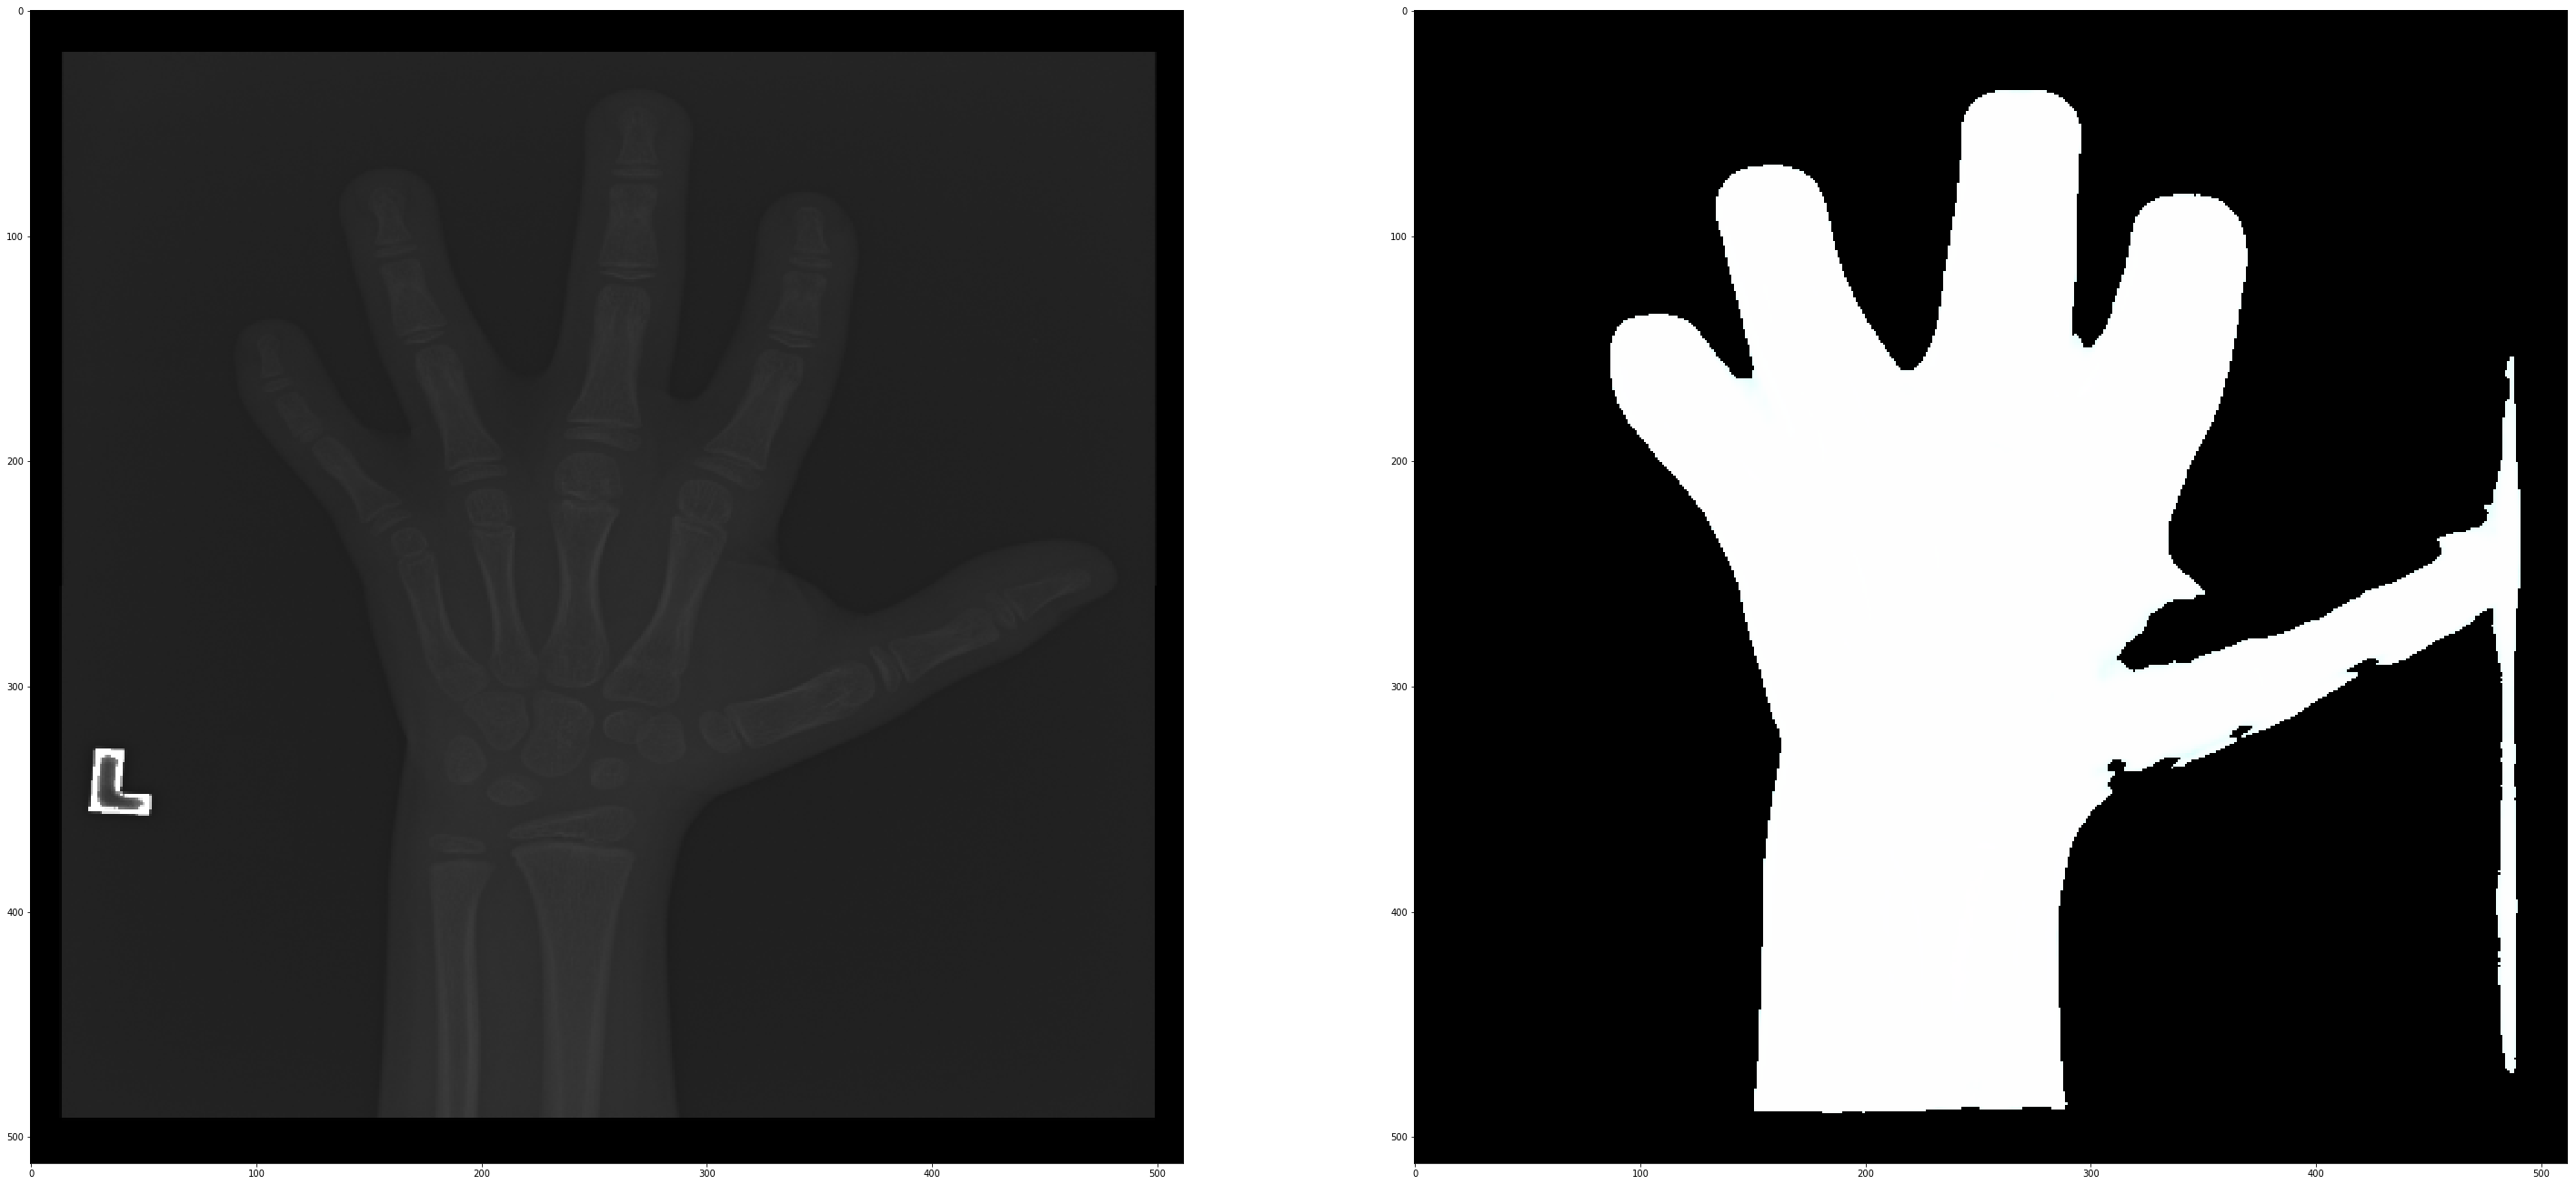

In [7]:
#testing on a single image
orig_images = cv2.imread('4204.png')
orig_images = cv2.resize(orig_images, (512, 512))
image = np.expand_dims(orig_images, axis=0)
mpo = model.predict(image)
a = np.uint8(mpo*255)
a = a.reshape(512,512,3)
gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
output_mask = preprocess(a, gray)
fig = plt.figure(figsize=(50, 50))
columns = 2
rows = 1
fig.add_subplot(rows, columns, 1)
plt.imshow(orig_images)
fig.add_subplot(rows, columns, 2)
#res = cv2.bitwise_and(orig_images, output_mask)
plt.imshow(output_mask)
plt.show()


In [ ]:
orig_images = cv2.imread('4189.png')
orig_images = cv2.resize(orig_images, (512, 512))
image = np.expand_dims(orig_images, axis=0)
mpo = model.predict(image)
a = np.uint8(mpo*255)
a = a.reshape(512,512,3)
gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
ret, gray = cv2.threshold(gray, 250, 255,0)
image, contours, hierarchy = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
largest_areas = sorted(contours, key=cv2.contourArea)
x,y,w,h = cv2.boundingRect(largest_areas[-1])
mask = np.zeros((512,512),dtype= np.uint8)
cv2.drawContours(mask, [largest_areas[-1]], 0, (255,255,255,255), -1)
image = cv2.bitwise_and(orig_images, orig_images, mask=mask)
#cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

roi=image[y-20:y+h+20,x-20:x+w+20]

roi=cv2.resize(roi,(512,512))

fig = plt.figure(figsize=(50, 50))
columns = 2
rows = 1
fig.add_subplot(rows, columns, 1)
plt.imshow(orig_images)
fig.add_subplot(rows, columns, 2)
    #res = cv2.bitwise_and(orig_images, output_mask)
plt.imshow(roi)
plt.show()
cv2.imwrite('output.png',roi)
cv2.imwrite('input.png',orig_images)
cv2.imwrite('mask.png',mask)

In [ ]:
d = cv2.imread('01.png')
len(orig)

In [ ]:
pat="/home/ubuntu/research/masks/training/masks/*"
orig = glob.glob(pat)
orig.sort()
    
    

In [ ]:
orig

In [8]:
!ls


01.png	  4237.png				mask.png
1511.png  4248.png				masks
1610.png  archive				modeltr_b2.h5
1902.jpg  ConvertSupervisely3imagesinto1.ipynb	modeltr.h5
1903.jpg  Createnewmasks-batch.ipynb		output.png
4189.png  Createnewmasks-Copy1.ipynb		plot.png
4197.png  Createnewmasks-Copy2.ipynb		train
4201.png  Createnewmasks-Copy3.ipynb		Unet-batches.ipynb
4204.png  Createnewmasks-Copy4.ipynb		Unet.ipynb
4209.png  Createnewmasks.ipynb			unet_train
4217.png  input.png				unet-train.ipynb
4229.png  logs


In [17]:
import itertools
import operator

def most_common(L):
  # get an iterable of (item, iterable) pairs
  SL = sorted((x, i) for i, x in enumerate(L))
  # print 'SL:', SL
  groups = itertools.groupby(SL, key=operator.itemgetter(0))
  # auxiliary function to get "quality" for an item
  def _auxfun(g):
    item, iterable = g
    count = 0
    min_index = len(L)
    for _, where in iterable:
      count += 1
      min_index = min(min_index, where)
    # print 'item %r, count %r, minind %r' % (item, count, min_index)
    return count, -min_index
  # pick the highest-count/earliest item
  return max(groups, key=_auxfun)[0]
e=cv2.imread('1902.jpg')

printmost_commonset))

(85, 194, 138)


In [4]:
import struct
import Image
import numpy as np
import scipy
import scipy.miscimport itertools
import operator

def most_common(L):
  # get an iterable of (item, iterable) pairs
  SL = sorted((x, i) for i, x in enumerate(L))
  # print 'SL:', SL
  groups = itertools.groupby(SL, key=operator.itemgetter(0))
  # auxiliary function to get "quality" for an item
  def _auxfun(g):
    item, iterable = g
    count = 0
    min_index = len(L)
    for _, where in iterable:
      count += 1
      min_index = min(min_index, where)
    # print 'item %r, count %r, minind %r' % (item, count, min_index)
    return count, -min_index
  # picimport itertools
import operator

def most_common(L):
  # get an iterable of (item, iterable) pairs
  SL = sorted((x, i) for i, x in enumerate(L))
  # print 'SL:', SL
  groups = itertools.groupby(SL, key=operator.itemgetter(0))
  # auxiliary function to get "quality" for an item
  def _auxfun(g):
    item, iterable = g
    count = 0
    min_index = len(L)
    for _, where in iterable:
      count += 1
      min_index = min(min_index, where)
    # print 'item %r, count %r, minind %r' % (item, count, min_index)
    return count, -min_index
  # pick the highest-count/earliest item
  return max(groups, key=_auxfun)[0]k the highest-count/earliest item
  return max(groups, key=_auxfun)[0]
import scipy.cluster

NUM_CLUSTERS = 5

im = Image.open('1902.jpg')
im = im.resize((150, 150))      # optional, to reduce time
ar = np.asarray(im)
shape = ar.shape
ar = ar.reshape(scipy.product(shape[:2]), shape[2]).astype(float)

print('finding clusters')
codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
print('cluster centres:\n', codes

vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
counts, bins = scipy.histogram(vecs, len(codes))    # count occurrences

index_max = scipy.argmax(counts)                    # find most frequent
peak = codes[index_max]
colour = ''.join(chr(int(c)) for c in peak).encode('hex')
print('most frequent is %s (#%s)' % (peak, colour))

SyntaxError: invalid syntax (<ipython-input-4-c9b4bc80edec>, line 20)

In [19]:
!pip2 install pillow

  Using cached Pillow-5.0.0-cp27-cp27mu-manylinux1_x86_64.whl
You are using pip version 8.1.1, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [20]:
!pip3 install pillow

  Using cached Pillow-5.0.0-cp35-cp35m-manylinux1_x86_64.whl
You are using pip version 8.1.1, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


e=cv2.imread('1902.jpg')
plt.imshow(e)
plt.show()

In [14]:
e=cv2.imread('4189.png')
orig_images = cv2.resize(e, (512, 512))
image = np.expand_dims(orig_images, axis=0)
mpo = model.predict(image)
a = np.uint8(mpo*255)
a = a.reshape(512,512,3)
def blend_transparent(face_img, overlay_t_img):
    # Split out the transparency mask from the colour info
    overlay_img = overlay_t_img[:,:,:3] # Grab the BRG planes
    overlay_mask = overlay_t_img[:,:,3:]  # And the alpha plane

    # Again calculate the inverse mask
    background_mask = 255 - overlay_mask

    # Turn the masks into three channel, so we can use them as weights
    overlay_mask = cv2.cvtColor(overlay_mask, cv2.COLOR_GRAY2BGR)
    background_mask = cv2.cvtColor(background_mask, cv2.COLOR_GRAY2BGR)

    # Create a masked out face image, and masked out overlay
    # We convert the images to floating point in range 0.0 - 1.0
    face_part = (face_img * (1 / 255.0)) * (background_mask * (1 / 255.0))
    overlay_part = (overlay_img * (1 / 255.0)) * (overlay_mask * (1 / 255.0))

    # And finally just add them together, and rescale it back to an 8bit integer image    
    return np.uint8(cv2.addWeighted(face_part, 255.0, overlay_part, 255.0, 0.0))

# ==============================================================================


result_2 = blend_transparent(orig_images, a)
plt.imshow(result_2)
plt.show()

error: /io/opencv/modules/imgproc/src/color.cpp:11128: error: (-215) scn == 1 && (dcn == 3 || dcn == 4) in function cvtColor


In [13]:
orig_images.shape

(512, 512, 3)

In [13]:
from PIL import Image

im = Image.open('1902.jpg')
im.save('1902.png')

In [14]:
!ls


01.png	  4229.png				logs
1511.png  4237.png				mask.png
1610.png  4248.png				masks
1902.jpg  archive				modeltr_b2.h5
1902.png  ConvertSupervisely3imagesinto1.ipynb	modeltr.h5
1903.jpg  Createnewmasks-batch.ipynb		output.png
4189.png  Createnewmasks-Copy1.ipynb		plot.png
4197.png  Createnewmasks-Copy2.ipynb		train
4201.png  Createnewmasks-Copy3.ipynb		Unet-batches.ipynb
4204.png  Createnewmasks-Copy4.ipynb		Unet.ipynb
4209.png  Createnewmasks.ipynb			unet_train
4217.png  input.png				unet-train.ipynb


In [18]:
!ls


01.png	  4229.png				logs
1511.png  4237.png				mask.png
1610.png  4248.png				masks
1902.jpg  archive				modeltr_b2.h5
1902.png  ConvertSupervisely3imagesinto1.ipynb	modeltr.h5
1903.jpg  Createnewmasks-batch.ipynb		output.png
4189.png  Createnewmasks-Copy1.ipynb		plot.png
4197.png  Createnewmasks-Copy2.ipynb		train
4201.png  Createnewmasks-Copy3.ipynb		Unet-batches.ipynb
4204.png  Createnewmasks-Copy4.ipynb		Unet.ipynb
4209.png  Createnewmasks.ipynb			unet_train
4217.png  input.png				unet-train.ipynb
